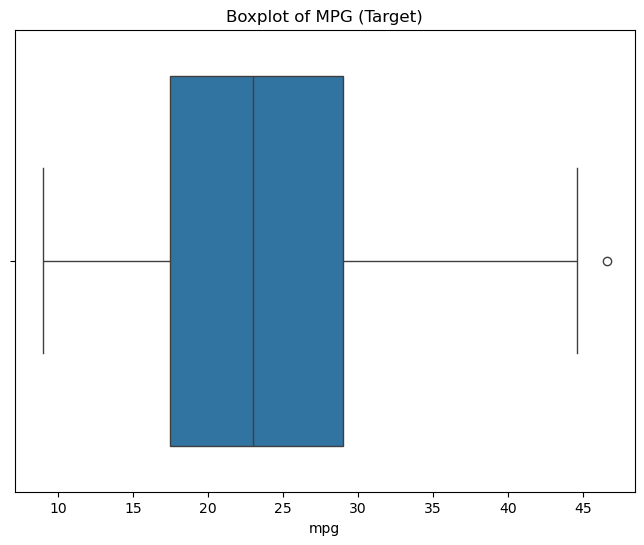

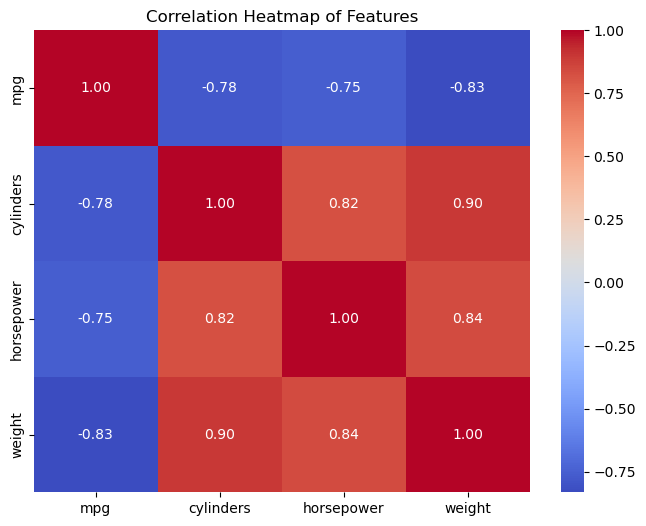

C:\Users\sunet\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "MyFirstNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MyFirstHL (Dense)                    │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MyFirstOL (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

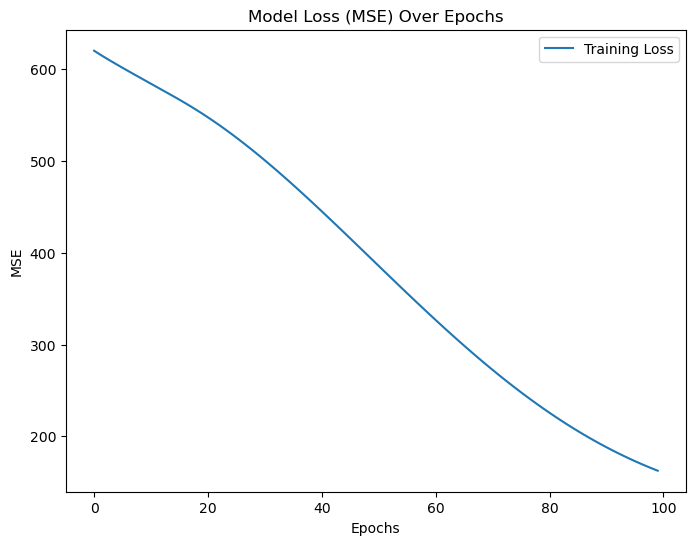

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


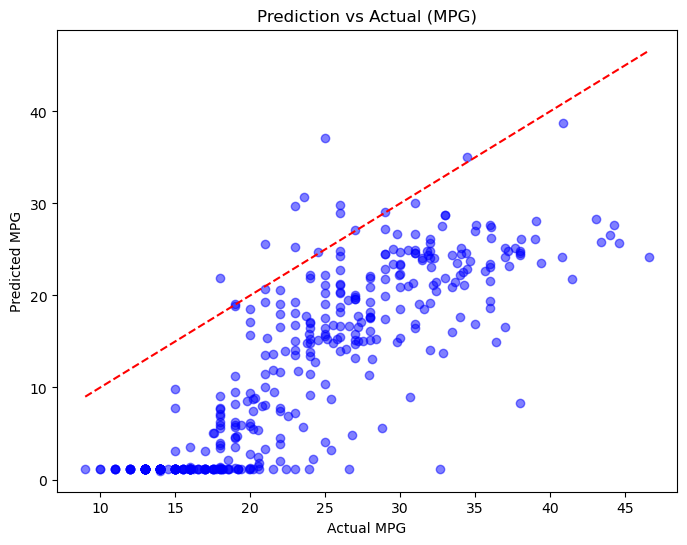

In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import random
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

random.seed(1693)
np.random.seed(1693)
tf.random.set_seed(1693)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load & Prep Dataframes
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
dataset = pd.read_csv(url, names=column_names, na_values="?", comment='\t', sep=' ', skipinitialspace=True)
data = dataset[['mpg', 'cylinders', 'horsepower', 'weight']]

# Fill missing values with zeros
data = data.fillna(0)

# Features (predictors) and target variable (mpg)
X = data[['cylinders', 'horsepower', 'weight']]
y = data['mpg']

# Visualize the distribution of MPG to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=y)
plt.title("Boxplot of MPG (Target)")
plt.show()

# Visualizing correlation between features
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Model
MyFirstNN = Sequential(name="MyFirstNN")
MyFirstNN.add(Dense(5, input_dim=X_scaled.shape[1], activation='relu', name="MyFirstHL"))
MyFirstNN.add(Dense(1, activation='linear', name="MyFirstOL"))
MyFirstNN.summary()

# Compile and train the model
MyFirstNN.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = MyFirstNN.fit(X_scaled, y, epochs=100, verbose=0)

# Plot loss curve (MSE over epochs)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Model Loss (MSE) Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Prediction vs Actual
y_pred = MyFirstNN.predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Line of perfect prediction
plt.title("Prediction vs Actual (MPG)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()
